# Sprint7 機械学習スクラッチ クラスタリング

## クラスタリングのための人工データセット

クラスタリングを実験するための人工データセットを作成するコードを用意しています。


このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。

In [86]:
import numpy as np
import pandas as pd

## 《シンプルデータセット3》

In [87]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

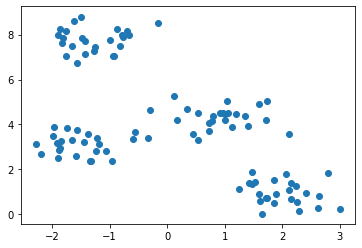

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1])

In [89]:
from sklearn.model_selection import train_test_split
# データ分割
X_train, X_test, X_train2, X_test2 = train_test_split(X, X, train_size=0.8, random_state=0)

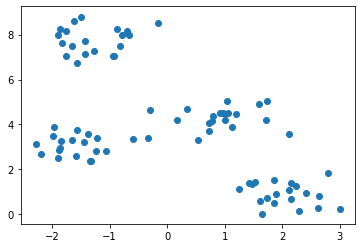

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_train[:, 0], X_train[:, 1])

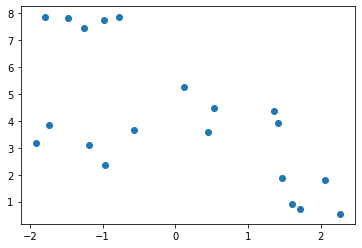

In [91]:
plt.scatter(X_test[:, 0], X_test[:, 1])

## 【問題1】中心点の初期値を決める

入力されたデータから $K$ 個の中心点 $\mu_1$ から $\mu_K$ の初期値を決めるコードを作成してください。$K$ は指定したクラスタ数です。

最もシンプルな初期値の決定方法は、データ点 $X_n$ の中からランダムに $K$ 個選ぶことです。今回はこれを実装してください。

K-meansの学習結果は中心点 $\mu$ の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

In [92]:
import numpy as np
k = 4

cluster = X[np.random.choice(X.shape[0], k, replace=False)]
cluster

array([[-1.86407034,  2.93379754],
       [-1.56102482,  3.77455362],
       [-0.59312453,  3.37090459],
       [-1.74448079,  3.84251413]])

## 【問題2】SSEを求める関数の作成

クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する $r_{nk}$ と $\mu_k$ を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

$$
SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2
$$

$n$ : データ点のインデックス

$k$ : クラスタのインデックス

$X_n$ : $n$番目のデータ点

$\mu_k$ : $k$番目の中心点

$r_{nk}$ : データ点$X_n$がクラスタ$k$に所属していたら1、そうでなければ0

### クラスタの割り当てと中心点の移動を繰り返す

K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。


・中心点 $\mu_k$ を固定した上で $SSE$ を最小化する クラスタの割り当て $r_{nk}$ を選ぶ。  
・クラスタの割り当て $r_{nk}$ を固定した上で $SSE$ を最小化する 中心点 $\mu_k$ を選ぶ。

最初の中心点 $\mu_k$ は問題1で作成した初期値です。


順番に見ていきます。

まず各ノードがどのクラスターに属するのかを配列に格納する

In [93]:
#　0番目のノードで考える
diff = X[0]-cluster
diff

array([[ 2.58493785,  0.77967369],
       [ 2.28189233, -0.06108239],
       [ 1.31399204,  0.34256664],
       [ 2.4653483 , -0.12904289]])

In [94]:
#　0番目のノードで考える
np.sqrt(diff[0,0]**2 + diff[0,1]**2)

2.6999619952943723

### ノードと各クラスタ間との距離に関しては、  

$a^2$ + $b^2$ = $c^2$から  
$c$ = $\sqrt{a^2 + b^2}$


In [95]:
# ノード0に対する各クラスタとの距離
np.sqrt((X[0]-cluster)[:,0]**2 + (X[0]-cluster)[:,1]**2)

array([2.699962  , 2.28270972, 1.35791273, 2.46872321])

In [96]:

np.sqrt(np.dot(X[0]-cluster, (X[0]-cluster).T))

array([[2.699962  , 2.41886864, 1.91407366, 2.50442824],
       [2.41886864, 2.28270972, 1.72553284, 2.37350829],
       [1.91407366, 1.72553284, 1.35791273, 1.78752406],
       [2.50442824, 2.37350829, 1.78752406, 2.46872321]])

In [98]:
# 各ノードと最近のクラスタを抽出する処理
distance_list = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    distance = np.array(np.sqrt((X[i]-cluster)[:,0]**2 + (X[i]-cluster)[:,1]**2))
    print(distance)
    distance_list[i] = distance.argmin()

distance_list.reshape(X.shape[0],1)

[2.699962   2.28270972 1.35791273 2.46872321]
[5.03528098 4.2076819  4.77874515 4.12920412]
[3.52437247 2.97688111 2.18852518 3.14491233]
[3.30822337 2.71163996 1.99273141 2.87280729]
[3.97818191 3.34899045 2.66938078 3.50100434]
[2.91384047 2.37393235 1.58232116 2.54604528]
[0.94375493 0.40851052 1.45381588 0.21519424]
[5.06424749 4.17953805 4.51193977 4.15184732]
[3.07404954 2.2583799  2.03826489 2.35626467]
[4.80137673 3.94330059 4.4252675  3.88577279]
[4.19881304 3.31342273 3.67139903 3.28742547]
[4.13089773 3.29385262 3.86868135 3.22056268]
[4.35858096 3.48919429 3.9387391  3.44205248]
[4.89517246 4.0164198  4.39642704 3.97999442]
[4.69377907 3.80821737 4.14524716 3.78219846]
[5.56530771 5.77772635 4.77412119 5.9645081 ]
[3.49859701 3.57890977 2.55057591 3.770604  ]
[1.59539151 1.28456664 0.2585082  1.47998648]
[0.         0.8937043  1.3440111  0.91655196]
[5.21466917 5.45276877 4.4618673  5.63753509]
[4.02685446 3.67750358 2.7120839  3.86478675]
[4.68294152 3.85084913 4.41991125 

array([[2.],
       [3.],
       [2.],
       [2.],
       [2.],
       [2.],
       [3.],
       [3.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [3.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [3.],
       [2.],
       [2.],
       [1.],
       [2.],
       [3.],
       [2.],
       [3.],
       [0.],
       [2.],
       [0.],
       [3.],
       [3.],
       [0.],
       [3.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [3.],
       [0.],
       [3.],
       [3.],
       [2.],
       [2.],
       [3.],
       [3.],
       [2.],
       [2.],
       [2.],
       [2.],
       [3.],
       [0.],
       [0.],
       [2.],
       [2.],
       [3.],
       [2.],
       [2.],
       [3.],
       [2.],
       [2.],
       [2.],

In [101]:
SSE = np.zeros(X.shape[0] * cluster.shape[0]).reshape(X.shape[0], cluster.shape[0])
print(SSE.shape)
for i in range(X.shape[0]):
    for k in  range(cluster.shape[0]):
        if distance_list[i] == k:
            rnk = 1
        else:
            rnk = 0
            
        SSE[i, k] = rnk * np.sum((X[i] - cluster[k])**2 , axis = 0)

SSE

(100, 4)


array([[0.00000000e+00, 0.00000000e+00, 1.84392699e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.70503267e+01],
       [0.00000000e+00, 0.00000000e+00, 4.78964248e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.97097849e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 7.12559373e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.50374026e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.63085629e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.72378361e+01],
       [0.00000000e+00, 0.00000000e+00, 4.15452375e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.50992302e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.08071662e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.03720240e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.18477253e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e

In [102]:
def calc_SSE(X, rnk):
    SSE = np.zeros(X.shape[0] * cluster.shape[0]).reshape(X.shape[0], cluster.shape[0])
    print(SSE.shape)
    for i in range(X.shape[0]):
        for k in  range(cluster.shape[0]):
            SSE[i, k] = rnk[i] * np.sum((X[i] - cluster[k])**2 , axis = 0)


## 【問題3】クラスタへの割り当て

In [103]:
def assign_cluster(X):
    # 各ノードと最近のクラスタを抽出する処理
    distance_list = np.zeros(X.shape[0])

    for i in range(X.shape[0]):
        distance = np.linalg.norm(X[i] - cluster, ord = 2, axis = 1)

        # 各ノードの最小値のIndexを格納
        distance_list[i] = distance.argmin()
        
    distance_list.reshape(X.shape[0],1)
    
    return distance_list

In [104]:
node_group = assign_cluster(X)
node_group

array([2., 3., 2., 2., 2., 2., 3., 3., 2., 3., 3., 3., 3., 3., 3., 2., 2.,
       2., 0., 2., 2., 3., 0., 2., 2., 0., 2., 2., 2., 2., 2., 3., 2., 2.,
       1., 2., 3., 2., 3., 0., 2., 0., 3., 3., 0., 3., 2., 0., 2., 2., 2.,
       2., 0., 3., 0., 3., 3., 2., 2., 3., 3., 2., 2., 2., 2., 3., 0., 0.,
       2., 2., 3., 2., 2., 3., 2., 2., 2., 0., 2., 2., 2., 3., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 3., 3., 1., 3., 2.])

## 【問題4】中心点の移動

In [105]:
X[node_group == 0]

array([[-1.86407034,  2.93379754],
       [-1.91186205,  3.18750686],
       [-1.57613028,  2.58614312],
       [-1.89928142,  2.50466299],
       [-1.44356727,  3.23539798],
       [-1.87418794,  2.84306499],
       [-1.84482705,  3.25609891],
       [-1.2386086 ,  2.81373288],
       [-0.96358605,  2.37791651],
       [-2.18485772,  2.68708996],
       [-1.32890066,  2.37135151],
       [-1.6609057 ,  3.31911046],
       [-1.33869125,  2.36818187],
       [-2.27253281,  3.13757811]])

In [106]:
import copy
def find_center(X, node_group):
    cluster_wk = copy.deepcopy(cluster)
    
    for k in range(cluster.shape[0]):
        Xk = X[node_group == k]
        cluster_wk[k] = np.mean(Xk)

        print("{} -> {}".format(cluster_wk[k], cluster[k]))
    
    return cluster_wk

In [108]:
find_center(X, node_group)

[0.5792723 0.5792723] -> [-1.86407034  2.93379754]
[1.09599006 1.09599006] -> [-1.56102482  3.77455362]
[1.98039805 1.98039805] -> [-0.59312453  3.37090459]
[2.99818107 2.99818107] -> [-1.74448079  3.84251413]


array([[0.5792723 , 0.5792723 ],
       [1.09599006, 1.09599006],
       [1.98039805, 1.98039805],
       [2.99818107, 2.99818107]])

## 【問題5】繰り返し

In [109]:
def fit(max_iter = 10):
    tol = 0
    
    for i in range(max_iter):
        node_group = assign_cluster(X)
        cluster_wk = find_center(X, node_group)
        
        distance = np.linalg.norm(cluster_wk - cluster, ord = 2, axis = 1)
        if np.sum(distance) < tol:
            break
        else:
            cluster = cluster_wk

## 以上をクラス化する。

## 《雛形》

In [111]:
import copy
    
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
        self.cluster = 0
        self.rnk = 0
        # self.SSE = 0
        self.SSE_list = 0

    def fit(self, X, clusters_roop = False):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        clusters_roop :bool (n_samples, n_features)
            エルボー法の為、指定したクラスタ数を0からself.n_clustersまでカウントアップするか 
            True:0から指定したクラスター数までカウントアップします。
            False:指定したクラスター数のみ実施します。
        """
        
        rnk_list =np.zeros(self.n_init * X.shape[0]).reshape(self.n_init, X.shape[0])
        SSE = np.zeros(self.n_init)
        
        self.SSE_list = np.zeros(self.n_clusters).reshape(self.n_clusters, 1)
        
        if clusters_roop == True:
            start_cnt = 0
        else:
            start_cnt = self.n_clusters - 1
        
        # ▼▼▼クラスタ数のループ処理
        for k in range(start_cnt, self.n_clusters):
            clusters_list = np.zeros(self.n_init * (k +1) * X.shape[1]).reshape(self.n_init,  k + 1, X.shape[1])    
        
            # ▼▼▼クラスタ数固定の処理(処理回数でループ)
            for n in range(self.n_init):
                # クラスタ初期化
                cluster = X[np.random.choice(X.shape[0], k + 1, replace=False)]        


                for i in range(self.max_iter):
                    # 各ノードをクラスタに属させる
                    rnk = self.assign_cluster(X, cluster)

                    # 次のクラスタ位置を算出する（移動はさせない）
                    cluster_wk = self.find_center(X, rnk, cluster)

                    # 新しい重心との距離を算出する
                    temp_distance = np.linalg.norm(cluster_wk - cluster, ord = 2, axis = 1)
                    distance = np.sum(temp_distance, axis = 0)

                    if distance < self.tol:
                        break
                        
                    else:
                        # クラスタ位置を更新
                        cluster = cluster_wk

                rnk_list[n] = rnk
                clusters_list[n] = cluster

                # 各試行でのSSEの最小値
                SSE[n] = self.calc_SSE(X, rnk, cluster)

                
                if self.verbose:
                    #verboseをTrueにした際は学習過程を出力
                    print("★★★クラスター数 = {}, 初期化回数：{}回目：SSE = {}".format(k+1, n+1, SSE[n]))                  


            # 最終的なクラスタを算出する
            self.cluster = clusters_list[np.argmin(SSE)]
            self.rnk = rnk_list[np.argmin(SSE)]

            if self.verbose:
                # 最終的なクラスター位置を表示
                print("★★★Final cluster = \n{}".format(self.cluster))

                # あるクラスタ数の際のSSEの最小値
                print("★★★np.min(SSE) = {}".format(np.min(SSE)))
                
            # 各クラスタ数でのSSEのリスト。　クラスタ数固定の場合は該当のクラスタ数にのみセット（他は０）
            self.SSE_list[k] = np.min(SSE)
            
            # ▲▲▲クラスタ数固定の処理　■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■            
        # ▲▲▲クラスタ数のループ処理　■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
        
        # すべてのクラスターでのSSEの値を表示
        if self.verbose:        
            for k in range(self.SSE_list.shape[0]):
                print("★★★SSE_list[{}] = {}".format(k, self.SSE_list[k])) 
        
    
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        
        Parameters
        ----------        
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量        
        """
        rnk = self.assign_cluster(X, self.cluster)

        
        return rnk
    
    def assign_cluster(self, X, cluster):
        """
        各ノードと最近のクラスタを抽出する処理
        
        Parameters
        ----------        
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量   
        cluster : 次の形のndarray, shape (クラスター数, n_features)
            クラスター            
        """
        
        distance_list = np.zeros(X.shape[0])

        for i in range(X.shape[0]):
            distance = np.linalg.norm(X[i] - cluster, ord = 2, axis = 1)

            # 各ノードの最小値のIndexを格納
            distance_list[i] = distance.argmin()

        distance_list.reshape(X.shape[0],1)

        return distance_list
    

    def find_center(self, X, rnk, cluster):
        """
        各ノードとクラスタの位置から平均（重心）を計算する処理
        
        Parameters
        ----------        
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量   
        rnk : 次の形のndarray, shape (n_samples, 1)
            各ノードがどのクラスターに属しているかというリスト   
        cluster：次の形のndarray, shape (クラスター数, n_features)
            クラスターリスト
        """        
        # 現状のクラスターをworkにコピーする
        cluster_wk = copy.deepcopy(cluster)
        for k in range(cluster.shape[0]):
            # クラスターが一致するものを抽出
            Xk = X[rnk == k]
            
            if len(Xk) <= 0:
                # クラスター内にノードがいない場合、クラスターをそのままセット。
                cluster_wk[k] = cluster[k]
            else:
                # クラスター内にノードがいる場合は、平均（重心）を求める
                cluster_wk[k] = np.mean(Xk, axis = 0)  

        return cluster_wk
    
    def calc_SSE(self, X, rnk, cluster):
        """
        SSEを計算する処理
        
        Parameters
        ----------        
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量   
        rnk : 次の形のndarray, shape (n_samples, 1)
            各ノードがどのクラスターに属しているかというリスト   
        cluster：次の形のndarray, shape (クラスター数, n_features)
            クラスターリスト
        """  
        SSE = np.zeros(X.shape[0] * cluster.shape[0]).reshape(X.shape[0], cluster.shape[0])

        for i in range(X.shape[0]):
            for k in  range(cluster.shape[0]):
                
                if rnk[i] == k:
                    rnk_value = 1
                else:
                    rnk_value = 0
                
                SSE[i, k] = rnk_value * np.linalg.norm(X[i] - cluster[k], ord = 2, axis = 0)
                      
        SSE = np.sum(SSE) 

        return SSE
    
    def plot_scatter(self, X, rnk):
        """
        グラフを表示する処理
        
        Parameters
        ----------        
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量   
        rnk : 次の形のndarray, shape (n_samples, 1)
            各ノードがどのクラスターに属しているかというリスト   
        """  
        # クラスタ―を表示
        print("■■■self.cluster = \n{}".format(self.cluster))
        for c in range(self.n_clusters):
            Xc = X[rnk == c]
            plt.scatter(Xc[:, 0], Xc[:, 1], label=c+1)

        plt.scatter(self.cluster[:,0], self.cluster[:,1], c="black", marker="x", label='center_point')
        plt.title('Scatter Plot of KMeans')
        plt.xlabel('X0')
        plt.ylabel('X1')
        plt.legend()
        plt.show

## 【問題6】異なる初期値で計算

クラス内に記入

In [32]:
n_clusters = 4
n_init = 10
max_iter = 10 
tol = 1e-5
verbose=True

slm = ScratchKMeans(n_clusters, n_init, max_iter, tol, verbose)


In [33]:
# 学習
slm.fit(X_train, clusters_roop = True)

★★★クラスター数 = 1, 初期化回数：1回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：2回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：3回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：4回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：5回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：6回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：7回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：8回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：9回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：10回目：SSE = 214.05496786721756
★★★Final cluster = 
[[0.04940493 4.02212287]]
★★★np.min(SSE) = 214.05496786721756
★★★クラスター数 = 2, 初期化回数：1回目：SSE = 149.57270364835176
★★★クラスター数 = 2, 初期化回数：2回目：SSE = 139.46030698254327
★★★クラスター数 = 2, 初期化回数：3回目：SSE = 139.46030698254327
★★★クラスター数 = 2, 初期化回数：4回目：SSE = 139.46030698254327
★★★クラスター数 = 2, 初期化回数：5回目：SSE = 139.46030698254327
★★★クラスター数 = 2, 初期化回数：6回目：SSE = 149.57270364835176
★★★クラスター数 = 2, 初期化回数：7回目：SSE = 139.46030698254327
★★★クラスター数 = 2, 初期化回数：8回目：SSE = 139.46030698254327
★★★クラスター数 = 2, 初期

### グラフ表示（クラスターループ無しで再学習）

★★★クラスター数 = 4, 初期化回数：1回目：SSE = 81.69530171611669
★★★クラスター数 = 4, 初期化回数：2回目：SSE = 95.8837926289959
★★★クラスター数 = 4, 初期化回数：3回目：SSE = 81.74070019090324
★★★クラスター数 = 4, 初期化回数：4回目：SSE = 95.8837926289959
★★★クラスター数 = 4, 初期化回数：5回目：SSE = 50.51844459888073
★★★クラスター数 = 4, 初期化回数：6回目：SSE = 95.8837926289959
★★★クラスター数 = 4, 初期化回数：7回目：SSE = 50.51844459888072
★★★クラスター数 = 4, 初期化回数：8回目：SSE = 50.51844459888072
★★★クラスター数 = 4, 初期化回数：9回目：SSE = 50.51844459888073
★★★クラスター数 = 4, 初期化回数：10回目：SSE = 81.75291188480453
★★★Final cluster = 
[[ 0.96378346  4.32257132]
 [-1.2702941   7.76467286]
 [ 2.03452042  0.91417063]
 [-1.53039006  3.08707668]]
★★★np.min(SSE) = 50.51844459888072
★★★SSE_list[0] = [0.]
★★★SSE_list[1] = [0.]
★★★SSE_list[2] = [0.]
★★★SSE_list[3] = [50.5184446]
■■■self.cluster = ¥n[[ 0.96378346  4.32257132]
 [-1.2702941   7.76467286]
 [ 2.03452042  0.91417063]
 [-1.53039006  3.08707668]]


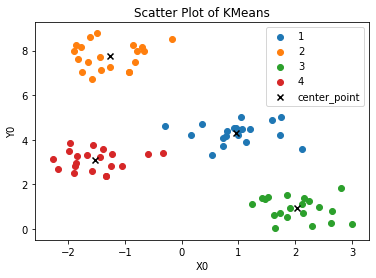

In [34]:
slm.fit(X_train, clusters_roop = False)
slm.plot_scatter(X_train, slm.rnk)

## 【問題7】推定

[3. 2. 0. 1. 0. 3. 2. 1. 3. 1. 3. 0. 2. 1. 1. 2. 3. 0. 2. 0.]
■■■self.cluster = ¥n[[ 0.96378346  4.32257132]
 [-1.2702941   7.76467286]
 [ 2.03452042  0.91417063]
 [-1.53039006  3.08707668]]


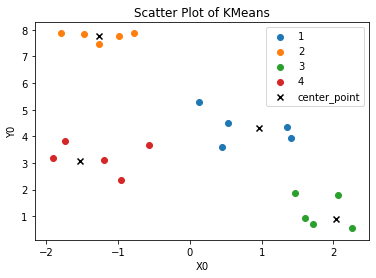

In [35]:
rnk = slm.predict(X_test)
print(rnk)
slm.plot_scatter(X_test, rnk)

In [36]:
X_pred = slm.predict(X_test)
X_pred

array([3., 2., 0., 1., 0., 3., 2., 1., 3., 1., 3., 0., 2., 1., 1., 2., 3.,
       0., 2., 0.])

## 【問題8】エルボー法の実装

In [37]:
n_clusters = 15
n_init = 10
max_iter = 10 
tol = 1e-5
verbose=True

slm_elv = ScratchKMeans(n_clusters, n_init, max_iter, tol, verbose)

slm_elv.fit(X_train, clusters_roop = True)

★★★クラスター数 = 1, 初期化回数：1回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：2回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：3回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：4回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：5回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：6回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：7回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：8回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：9回目：SSE = 214.05496786721756
★★★クラスター数 = 1, 初期化回数：10回目：SSE = 214.05496786721756
★★★Final cluster = 
[[0.04940493 4.02212287]]
★★★np.min(SSE) = 214.05496786721756
★★★クラスター数 = 2, 初期化回数：1回目：SSE = 149.57270364835176
★★★クラスター数 = 2, 初期化回数：2回目：SSE = 149.57270364835176
★★★クラスター数 = 2, 初期化回数：3回目：SSE = 149.57270364835176
★★★クラスター数 = 2, 初期化回数：4回目：SSE = 139.46030698254327
★★★クラスター数 = 2, 初期化回数：5回目：SSE = 139.46030698254327
★★★クラスター数 = 2, 初期化回数：6回目：SSE = 139.46030698254327
★★★クラスター数 = 2, 初期化回数：7回目：SSE = 139.46030698254327
★★★クラスター数 = 2, 初期化回数：8回目：SSE = 139.46030698254327
★★★クラスター数 = 2, 初期

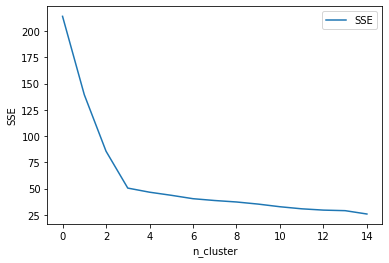

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(slm_elv.SSE_list.shape[0]), slm_elv.SSE_list, label='SSE')
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.legend()



## 【問題9】（アドバンス課題）シルエット図

### Skip

In [53]:
from matplotlib import cm
y_ax_lower, y_ax_upper = 0, 0
yticks = []
def plot_silhouette(cluster_labels):
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

In [54]:
plot_silhouette(slm.cluster)

NameError: name 'silhouette_vals' is not defined

# 3.クラスタ分析

## 卸売業者のデータ分析

In [3]:
import pandas as pd
import numpy as np

データ読込

In [4]:
base_df = pd.read_csv('./Wholesale customers data.csv')
base_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


Channel、Region列削除

In [5]:
df = base_df.drop(["Channel","Region"], axis=1)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


ログスケールに変換

In [6]:
df_log = np.log(df)
df_log

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


Attribute Information:  

1)FRESH           ：生鮮品に対する年間支出（単位：百万円）  
2)MILK            ：牛乳製品に対する年間支出額（単位：百万円）  
3)GROCERY         ：食料品の年間支出(百万円)   
4)FROZEN          ：冷凍製品の年間支出  
5)DETERGENTS_PAPER：洗剤・紙製品への年間支出額（百万円）  
6DELICATESSEN     ：年間支出（m.u.）とデリカテッセン製品（連続）  
7)CHANNEL         ：顧客 チャネル - ホレカ（ホテル/レストラン/カフェ）または小売チャネル  
8)REGION          ：顧客 地域 - リスノン、オポルト、その他  


## 次元削減

### 《PCAのサンプルコード》

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(df_log)
data_pca = pca.transform(df_log)

In [8]:
data_pca.shape

(440, 2)

### 《PCAの分散説明率を表示するコードサンプル》

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


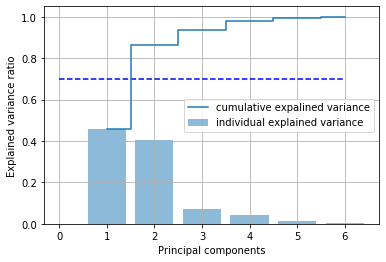

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(df)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

## 【問題10】クラスタ数kの選択

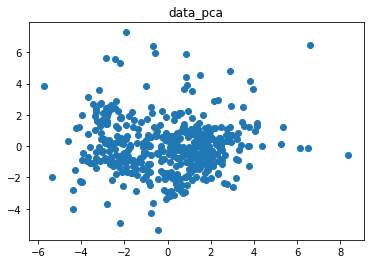

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("data_pca")
plt.scatter(data_pca[:,0], data_pca[:,1])

In [48]:
n_clusters = 20
n_init = 10
max_iter = 10 
tol = 1e-5
verbose=False

slm_pca = ScratchKMeans(n_clusters, n_init, max_iter, tol, verbose)

In [49]:
slm_pca.fit(data_pca, clusters_roop = True)

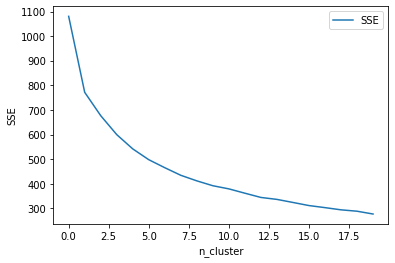

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(slm_pca.SSE_list.shape[0]), slm_pca.SSE_list, label='SSE')
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.legend()

エルボー法で計算した時のクラスター表示

[ 5.  5.  5. 10.  1.  5.  2.  5.  2. 19.  5.  8.  5.  5.  5.  6.  0. 18.
  1.  2.  1.  8. 14. 13.  1.  2.  8.  7. 19. 18.  1.  6.  6. 14. 11.  0.
 14.  5.  0. 10. 14.  1.  0.  0.  2. 19. 19.  3.  5. 19.  8.  2.  1.  0.
 10.  2. 19.  0. 17. 16.  2.  3.  5.  5. 18.  0. 15.  5. 18. 17. 10.  1.
  6. 14.  5.  4.  6. 19. 17.  2. 17.  0.  5.  8.  2.  3.  3. 13.  7. 14.
  7. 10.  3. 10. 16. 15. 15. 12. 12.  8.  5. 16.  5. 14. 18.  8.  0. 19.
 16.  9.  8. 19. 14.  8. 10.  8. 17. 18. 10.  8.  8. 17.  4.  2. 10. 14.
 10.  5. 15. 10.  8. 12.  6. 17.  7. 17.  5. 11.  6.  6.  1.  8.  7.  8.
 11. 19.  7.  6.  7. 10.  8. 11.  8.  6. 12. 16. 16.  8. 16.  0. 16.  4.
  8. 19.  2.  5.  5.  2.  7.  7.  0.  0.  0.  0. 11.  0.  1. 10.  8.  8.
  5. 13.  0. 13.  9.  7. 17. 11.  5.  0.  7.  7. 17.  0. 17. 14. 14. 16.
 18. 17. 19. 19. 14.  9.  7. 16. 17.  2.  2. 19. 10.  3.  8. 16. 16. 19.
  0. 10.  0.  7.  7.  0.  8. 18.  7.  6.  1. 17. 11. 18.  1.  2.  8.  9.
 10.  2. 17.  7.  7. 14. 14. 10.  8. 18.  5. 16.  8

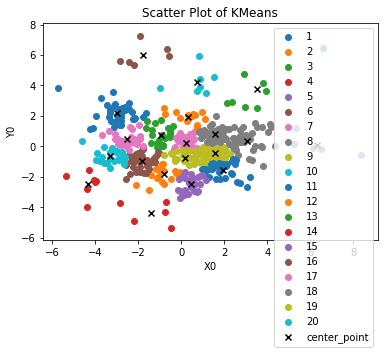

In [51]:
rnk = slm_pca.predict(data_pca)
print(rnk)
slm_pca.plot_scatter(data_pca, rnk)

なんやよう分からん。

### <クラスター数４では>

■■■self.cluster = 
[[-2.2183084   2.46117964]
 [-2.18361413 -0.78264917]
 [ 2.29439694  0.9261051 ]
 [ 0.86356474 -1.12288497]]


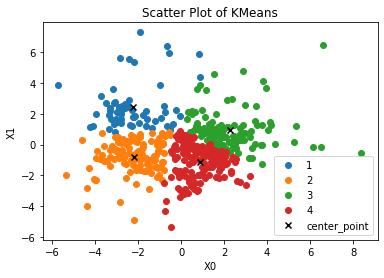

In [58]:
n_clusters = 4
n_init = 10
max_iter = 10 
tol = 1e-5
verbose=False

cluster4 = ScratchKMeans(n_clusters, n_init, max_iter, tol, verbose)

#cluster4.n_clusters = 4
cluster4.fit(data_pca, clusters_roop = False)
cluster4.plot_scatter(data_pca, cluster4.rnk)

### <クラスター数５では>

■■■self.cluster = 
[[ 1.25984479 -1.48070079]
 [ 2.71001663  1.11981324]
 [ 0.17988392  0.47452185]
 [-2.58596634  2.55478066]
 [-2.34208445 -0.96666377]]


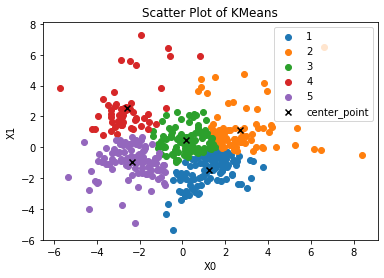

In [59]:
n_clusters = 5
n_init = 10
max_iter = 10 
tol = 1e-5
verbose=False

cluster5 = ScratchKMeans(n_clusters, n_init, max_iter, tol, verbose)

#cluster4.n_clusters = 4
cluster5.fit(data_pca, clusters_roop = False)
cluster5.plot_scatter(data_pca, cluster5.rnk)

### <クラスター数６では>

■■■self.cluster = 
[[-3.63638541e-01 -2.32176969e+00]
 [ 1.58677086e-04  5.22004193e-01]
 [-2.61967627e+00 -6.84459955e-01]
 [ 1.71309284e+00 -7.52122706e-01]
 [-2.52836951e+00  2.66925328e+00]
 [ 2.91039415e+00  1.37900983e+00]]


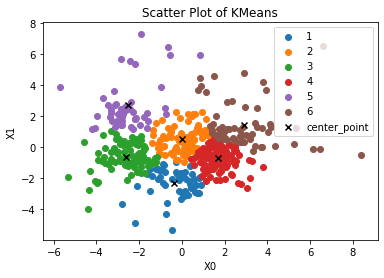

In [60]:
n_clusters = 6
n_init = 10
max_iter = 10 
tol = 1e-5
verbose=False

cluster5 = ScratchKMeans(n_clusters, n_init, max_iter, tol, verbose)

#cluster4.n_clusters = 4
cluster5.fit(data_pca, clusters_roop = False)
cluster5.plot_scatter(data_pca, cluster5.rnk)

以上の結果から、最適なクラスタ数は４と考えられる。  
クラスタ数４ではX0,X1がほぼ0の時に４等分することができ、説明が容易である。  
クラスタ数が増えていくにつれ、エルボー法の際に出力したグラフのように、離散値のみでクラスタリングされ、説明が複雑になる。  
クラスタ数４の辺りが最適かと考える。

## 【問題11】既知のグループとの比較

#### ＜Channelで集計する＞
HPよりChannelの内訳は、  
・Horeca(ホレカ（ホテル/レストラン/カフェ）) 298  
・Retail(小売) 142  
Total 440  

In [15]:
df_Channel = base_df["Channel"]
df_Channel

0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
437    2
438    1
439    1
Name: Channel, Length: 440, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

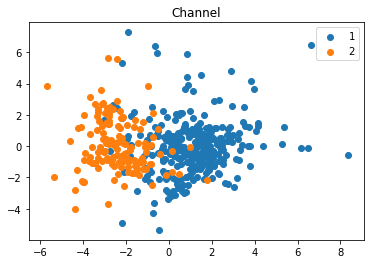

In [16]:
for i in np.unique(df_Channel):
    plt.scatter(data_pca[np.where(df_Channel==i)][:,0], data_pca[np.where(df_Channel==i)][:,1], label=i)
plt.title('Channel')
plt.legend()
plt.show

#### ＜Regionで集計する＞
HPよりChannelの内訳は、  
・Lisbon(リスノン) 77  
・Oporto(オポルト) 47  
・Other Region(その他) 316  
Total 440  

In [17]:
df_Region = base_df["Region"]

<function matplotlib.pyplot.show(*args, **kw)>

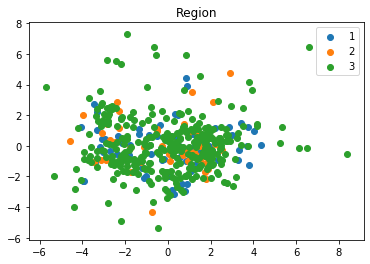

In [18]:
for i in np.unique(df_Region):
    plt.scatter(data_pca[np.where(df_Region==i)][:,0], data_pca[np.where(df_Region==i)][:,1], label=i)
plt.title('Region')
plt.legend()
plt.show

以上、それぞれのグラフから、  
Channelに関しては、【問題10】でのクラスタ数５の際のグラフでクラスタ[４，５]とクラスタ[１，２，３]で分けられる領域とほぼ等しい。  
Regionに関しては、各Regionの位置が混在しており、分類は困難である。

## 【問題12】卸売業者にとって有益な情報

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [20]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### 加工前のデータでpairplotしてみる

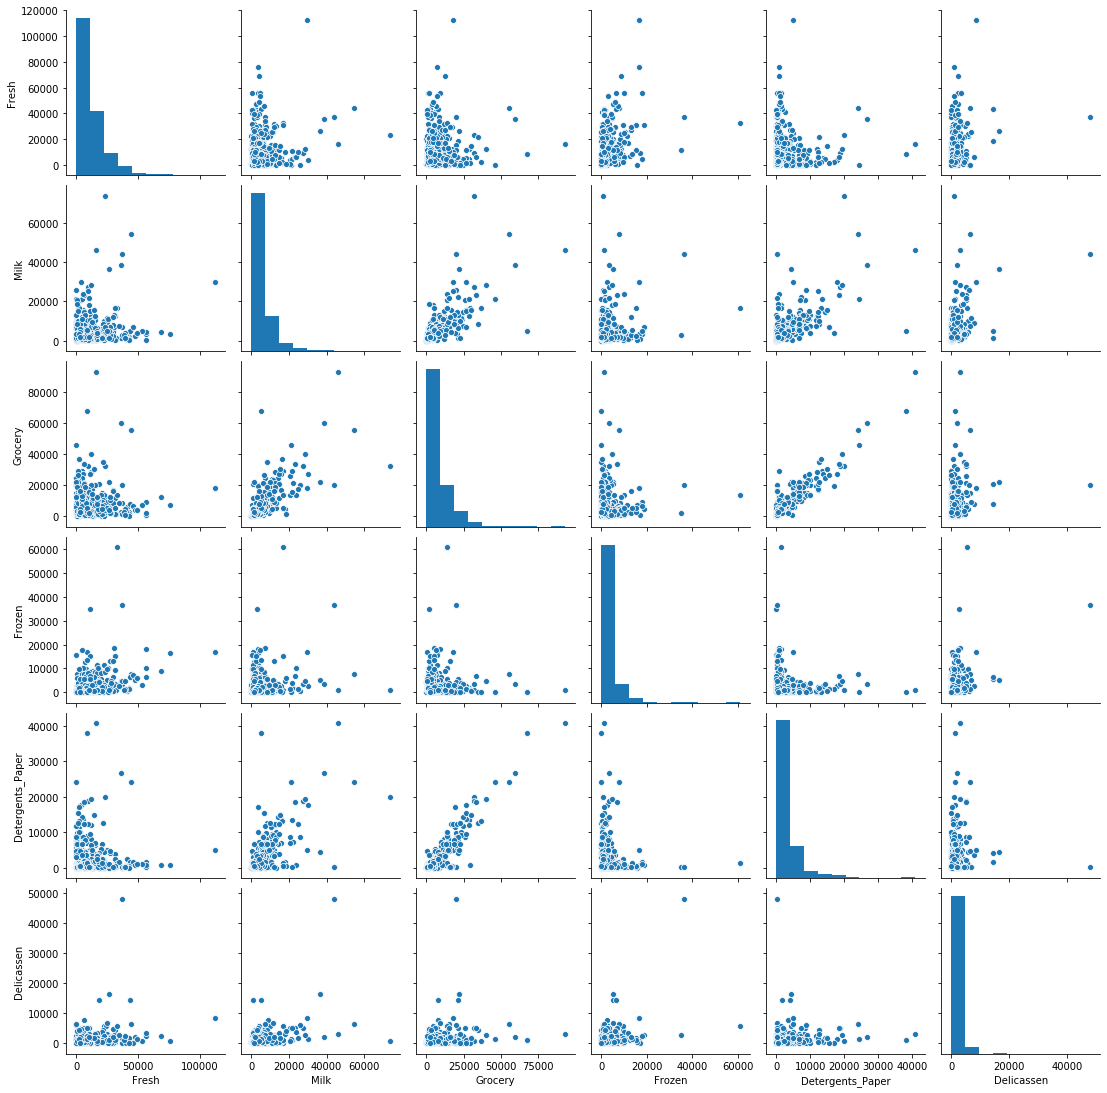

In [21]:
import seaborn as sns
sns.pairplot(df)

### ログスケールではどうなるか？

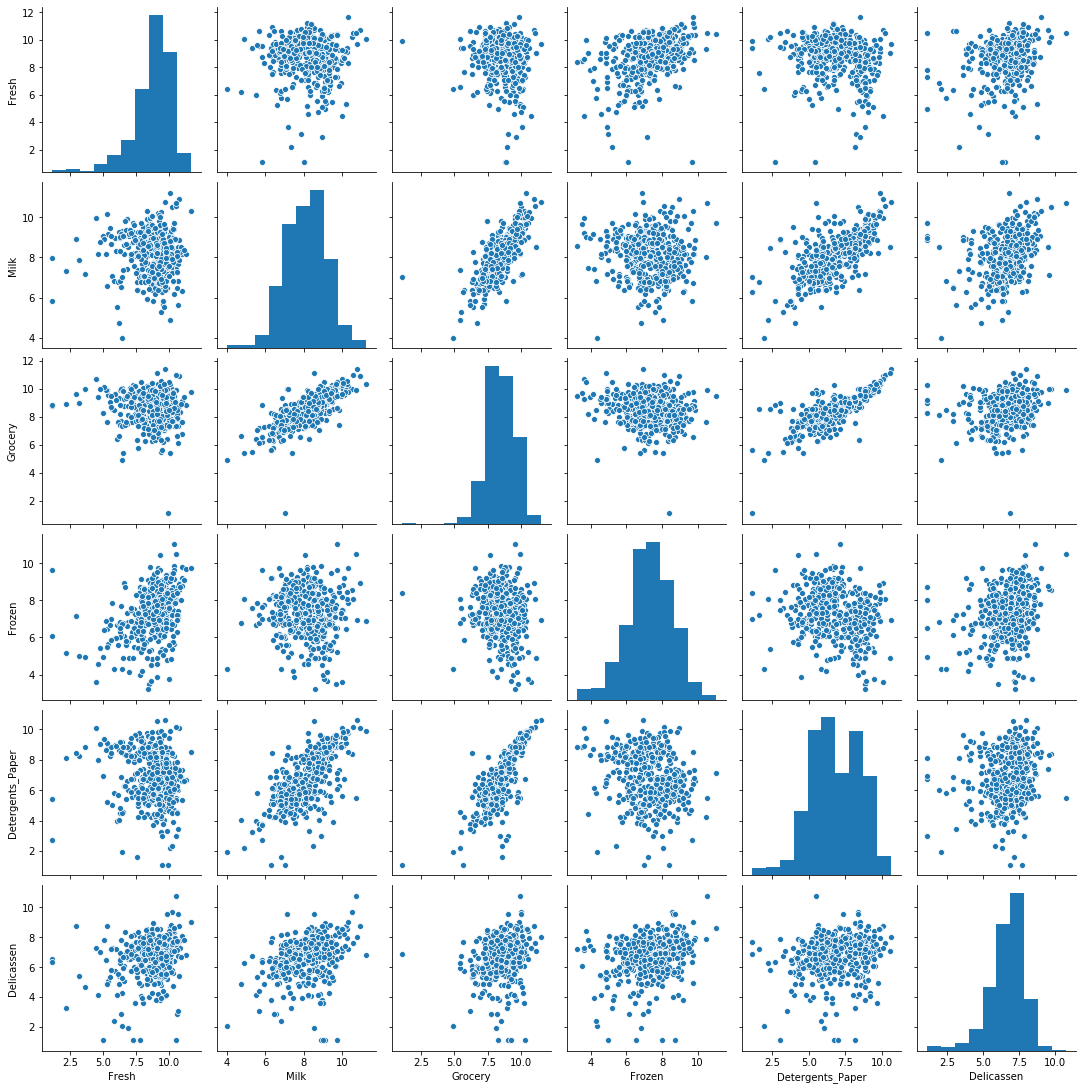

In [22]:
sns.pairplot(df_log)

### Channel毎に平均を出す

In [23]:
group_Channel = base_df.groupby(["Channel"]).mean()
group_Channel

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
2,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


In [66]:
group_Channel[0:1]

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376


### 各Channelの区分を棒グラフにしてみる。

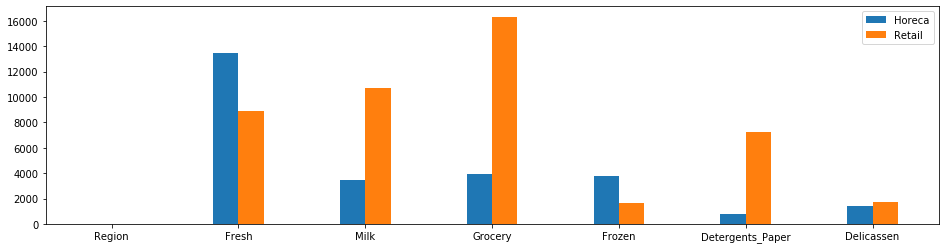

In [30]:
plt.figure(figsize=(16,4))
# X座標を設定
left = np.arange(group_Channel.shape[1]) 
width = 0.2
labels = base_df.groupby(['Channel']).mean().columns.values

plt.bar(left, np.array(group_Channel[0:1]).reshape(-1), width=width, label="Horeca")
plt.bar(left+width, np.array(group_Channel[1:2]).reshape(-1), width=width, label="Retail")

plt.xticks(left + width/2, labels)
plt.legend()
plt.show()

【考察】  
・ホテル/レストラン/カフェでは、Retailと比べてFreshとFrozenの比率が高い。  
　飲食業界として、大量購入して冷蔵/冷凍庫に保存するためかと考えられる。小売りは逐次消費していく為、それほど比率が高くないと考えられる。  
・一方小売りでは、Milk/Grocery/Detergents_Paper/Delicassenの比率がホテル/レストラン/カフェより高い  
　これは、日用品として逐次消費していく為と考えられる。

### Region毎に平均を出す

In [31]:
group_Region = base_df.groupby(["Region"]).mean()
group_Region

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
2,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
3,1.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


### 棒グラフにしてみる

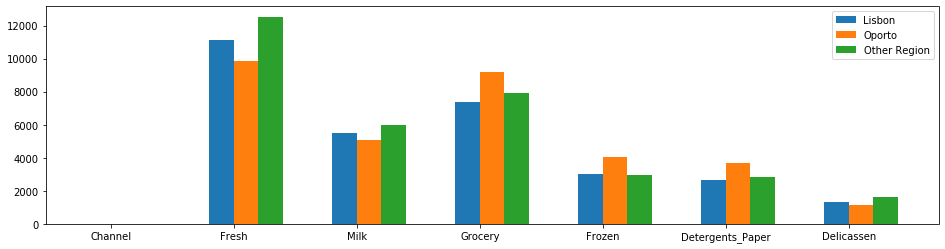

In [33]:
plt.figure(figsize=(16,4))
# X座標を設定
left = np.arange(group_Region.shape[1]) 
width = 0.2
labels = base_df.groupby(['Region']).mean().columns.values


plt.bar(left, np.array(group_Region[0:1]).reshape(-1), width=width, label="Lisbon")
plt.bar(left+width, np.array(group_Region[1:2]).reshape(-1), width=width, label="Oporto")
plt.bar(left+width*2, np.array(group_Region[2:3]).reshape(-1), width=width, label="Other Region")

plt.xticks(left + width/2, labels)
plt.legend()
plt.show()

【考察】  
Lisbonでは、他のRegionと比べて特筆すべき点はない。（各区分でも順位としては２～３位である）  
Oportoでは、Grocery/Frozen/Detergents_Paperの比率が他のRegionより高い。  
Otherでは、Fresh/Milkが他のRegionより高い比率を示している。

### 第１キー：Channel、第２キー：Region　で集計してみる

In [70]:
base_df.groupby(['Channel', 'Region']).mean()


Fresh          Milk       Grocery       Frozen  \
Channel Region                                                          
1       1       12902.254237   3870.203390   4026.135593  3127.322034   
        2       11650.535714   2304.250000   4395.500000  5745.035714   
        3       13878.052133   3486.981043   3886.734597  3656.900474   
2       1        5200.000000  10784.000000  18471.944444  2584.111111   
        2        7289.789474   9190.789474  16326.315789  1540.578947   
        3        9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen  
Channel Region                                 
1       1             950.525424  1197.152542  
        2             482.714286  1105.892857  
        3             786.682464  1518.284360  
2       1            8225.277778  1871.944444  
        2            8410.263158  1239.000000  
        3            6899.238095  1826.209524

### 各Region毎にHerecaとRetailの比率をグラフ化する

#### ≪Lisbon≫

In [74]:
# Lisbonのデータ抽出
goup_Lisbon = base_df[base_df["Region"] == 1]

# Channel毎に集計
goup_Lisbon = goup_Lisbon.groupby(['Channel']).mean()
goup_Lisbon


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,1.0,12902.254237,3870.20339,4026.135593,3127.322034,950.525424,1197.152542
2,1.0,5200.000000,10784.00000,18471.944444,2584.111111,8225.277778,1871.944444


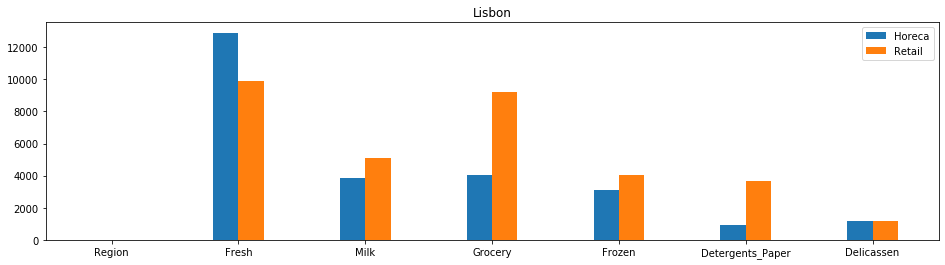

In [77]:
plt.figure(figsize=(16,4))
# X座標を設定
left = np.arange(goup_Lisbon.shape[1]) 
width = 0.2
labels = goup_Lisbon.columns.values


plt.bar(left, np.array(goup_Lisbon[0:1]).reshape(-1), width=width, label="Horeca")
plt.bar(left+width, np.array(group_Region[1:2]).reshape(-1), width=width, label="Retail")
#plt.bar(left+width*2, np.array(group_Region[2:3]).reshape(-1), width=width, label="Other Region")

plt.xticks(left + width/2, labels)
plt.legend()
plt.title("Lisbon")
plt.show()

Lisbonでは、  
FreshのみHerecaの比率が高く、それ以外はすべてRetailの比率の方が高い

#### ≪Oporto≫

In [81]:
# Lisbonのデータ抽出
goup_Oporton = base_df[base_df["Region"] == 2]

# Channel毎に集計
goup_Oporton = goup_Oporton.groupby(['Channel']).mean()
goup_Oporton


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,2.0,11650.535714,2304.250000,4395.500000,5745.035714,482.714286,1105.892857
2,2.0,7289.789474,9190.789474,16326.315789,1540.578947,8410.263158,1239.000000


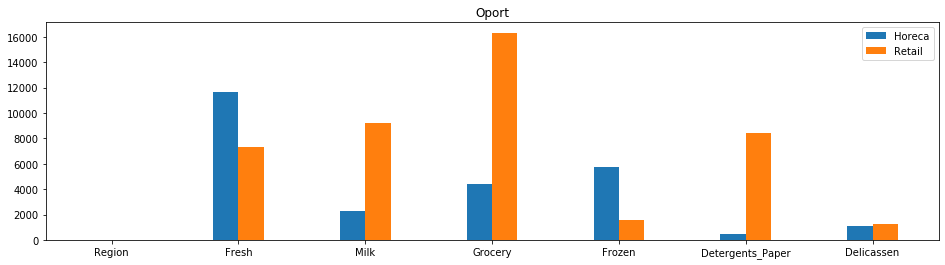

In [82]:
plt.figure(figsize=(16,4))
# X座標を設定
left = np.arange(goup_Lisbon.shape[1]) 
width = 0.2
labels = goup_Oporton.columns.values


plt.bar(left, np.array(goup_Oporton[0:1]).reshape(-1), width=width, label="Horeca")
plt.bar(left+width, np.array(goup_Oporton[1:2]).reshape(-1), width=width, label="Retail")
#plt.bar(left+width*2, np.array(group_Region[2:3]).reshape(-1), width=width, label="Other Region")

plt.xticks(left + width/2, labels)
plt.legend()
plt.title("Oport")
plt.show()

Oportoでは、  
FreshとFrozenはHerecaの比率が高く、それ以外はRetailの比率の方が高い

#### ≪Other Region≫

In [84]:
# Lisbonのデータ抽出
goup_Other = base_df[base_df["Region"] == 3]

# Channel毎に集計
goup_Other = goup_Oporton.groupby(['Channel']).mean()
goup_Other


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,3.0,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360
2,3.0,9831.504762,10981.009524,15953.809524,1513.200000,6899.238095,1826.209524


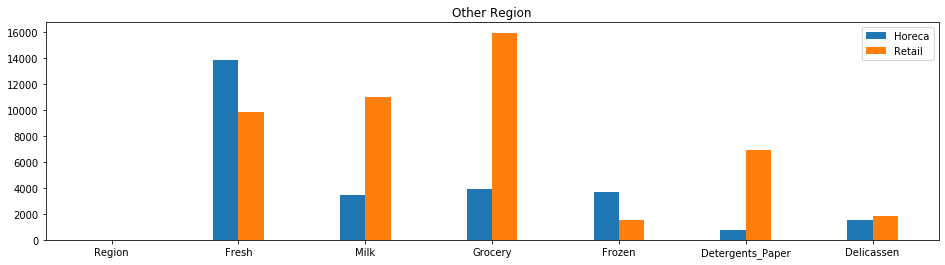

In [85]:
plt.figure(figsize=(16,4))
# X座標を設定
left = np.arange(goup_Other.shape[1]) 
width = 0.2
labels = goup_Other.columns.values


plt.bar(left, np.array(goup_Other[0:1]).reshape(-1), width=width, label="Horeca")
plt.bar(left+width, np.array(goup_Other[1:2]).reshape(-1), width=width, label="Retail")
#plt.bar(left+width*2, np.array(group_Region[2:3]).reshape(-1), width=width, label="Other Region")

plt.xticks(left + width/2, labels)
plt.legend()
plt.title("Other Region")
plt.show()

Other Regionでは、  
FreshとFrozenはHerecaの比率が高く、それ以外はRetailの比率の方が高い

### 各特徴量の相関係数を出してみる。

In [35]:
corr_df = base_df.corr()
corr_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


### ヒートマップを出してみる

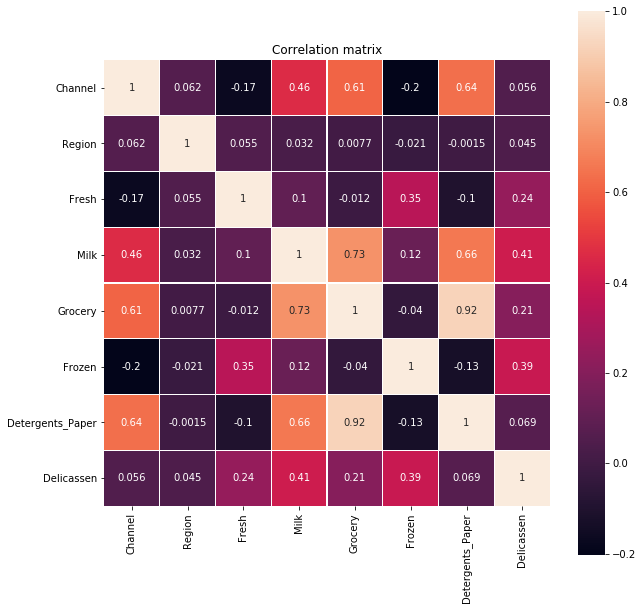

In [36]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10)) 
plt.title('Correlation matrix')
sns.heatmap(corr_df,linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)
plt.ylim(corr_df.shape[0], 0,)
plt.show()

[MilkとGrocery]、[MilkとDetergents_Paper]の間に正の相関がみられる

### Channelの各要素に関して相関係数を算出する。  
#### ≪まずはHoreca（ホテル/レストラン/カフェ）から≫

In [54]:
corr_Horeca = base_df[base_df["Channel"] == 1].corr()
corr_Horeca

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,NaN,1.000000,0.035909,-0.016579,-0.023223,0.012865,-0.038853,0.045847
Fresh,NaN,0.035909,1.000000,0.246527,0.235661,0.335765,-0.007456,0.254530
Milk,NaN,-0.016579,0.246527,1.000000,0.602613,0.408877,0.249936,0.629643
Grocery,NaN,-0.023223,0.235661,0.602613,1.000000,0.258679,0.548042,0.446873
Frozen,NaN,0.012865,0.335765,0.408877,0.258679,1.000000,-0.031201,0.428331
Detergents_Paper,NaN,-0.038853,-0.007456,0.249936,0.548042,-0.031201,1.000000,0.077777
Delicassen,NaN,0.045847,0.254530,0.629643,0.446873,0.428331,0.077777,1.000000


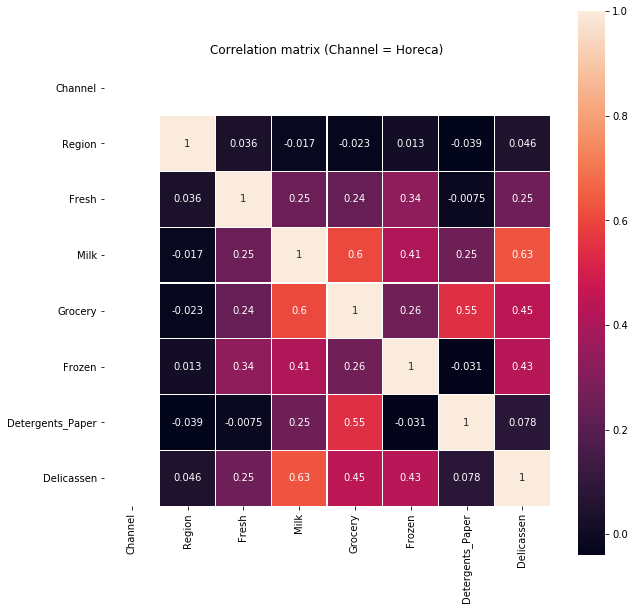

In [59]:
fig, ax = plt.subplots(figsize=(10, 10)) 
plt.title('Correlation matrix (Channel = Horeca)')
sns.heatmap(corr_Horeca,linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)
plt.ylim(corr_Horeca.shape[0])
plt.show()

●ホテル/レストラン/カフェでは、[DelicassenとMilk]および[GroceryとMilk]の間に相関がある。

#### ≪次は小売≫

In [52]:
corr_Retail = base_df[base_df["Channel"] == 2].corr()
corr_Retail

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,NaN,1.000000,0.184103,0.027678,-0.063674,-0.174757,-0.089925,0.028438
Fresh,NaN,0.184103,1.000000,0.236805,0.088529,0.268481,0.022986,0.278137
Milk,NaN,0.027678,0.236805,1.000000,0.658654,0.174442,0.621950,0.343373
Grocery,NaN,-0.063674,0.088529,0.658654,1.000000,0.044592,0.923838,0.158441
Frozen,NaN,-0.174757,0.268481,0.174442,0.044592,1.000000,0.016837,0.316154
Detergents_Paper,NaN,-0.089925,0.022986,0.621950,0.923838,0.016837,1.000000,0.068347
Delicassen,NaN,0.028438,0.278137,0.343373,0.158441,0.316154,0.068347,1.000000


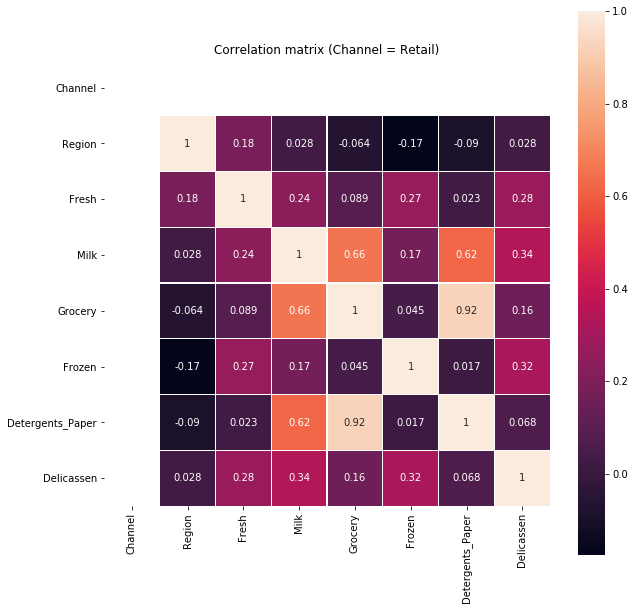

In [60]:
fig, ax = plt.subplots(figsize=(10, 10)) 
plt.title('Correlation matrix (Channel = Retail)')
sns.heatmap(corr_Retail,linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)
plt.ylim(corr_Retail.shape[0])
plt.show()

●小売りでは、[MilkとGrocery]および[MilkとDetergents_Paper]の間に相関がある。

### Regionの各要素に関して相関係数を算出する。  
#### ≪まずは Lisbonから≫

In [56]:
corr_Lisbon = base_df[base_df["Region"] == 1].corr()
corr_Lisbon

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,NaN,-0.283901,0.516276,0.724307,-0.074837,0.736385,0.213659
Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,-0.283901,NaN,1.000000,-0.149370,-0.190263,0.289624,-0.269078,0.207535
Milk,0.516276,NaN,-0.149370,1.000000,0.827244,0.134486,0.741455,0.469553
Grocery,0.724307,NaN,-0.190263,0.827244,1.000000,-0.026283,0.892291,0.345756
Frozen,-0.074837,NaN,0.289624,0.134486,-0.026283,1.000000,-0.070293,0.338845
Detergents_Paper,0.736385,NaN,-0.269078,0.741455,0.892291,-0.070293,1.000000,0.229406
Delicassen,0.213659,NaN,0.207535,0.469553,0.345756,0.338845,0.229406,1.000000


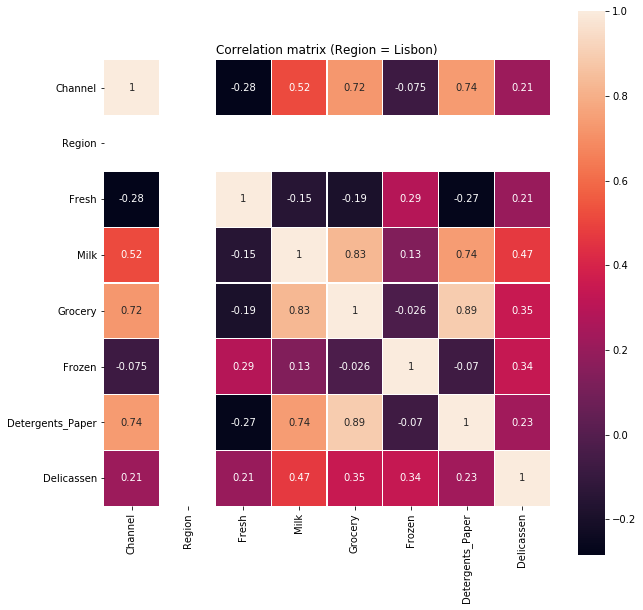

In [58]:
fig, ax = plt.subplots(figsize=(10, 10)) 
plt.title('Correlation matrix (Region = Lisbon)')
sns.heatmap(corr_Lisbon,linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)
plt.ylim(corr_Lisbon.shape[0])
plt.show()

●Lisbonでは、[MilkとGrocery]および[GroceryとDetergents_Paper]の間に相関がある。

#### ≪次は Oporto≫

In [61]:
corr_Oporto = base_df[base_df["Region"] == 2].corr()
corr_Oporto

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,NaN,-0.257891,0.586318,0.545832,-0.227894,0.603631,0.062840
Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,-0.257891,NaN,1.000000,-0.054046,-0.115035,0.381739,-0.206135,0.395588
Milk,0.586318,NaN,-0.054046,1.000000,0.413410,0.164760,0.365174,0.324800
Grocery,0.545832,NaN,-0.115035,0.413410,1.000000,-0.042158,0.947938,0.087679
Frozen,-0.227894,NaN,0.381739,0.164760,-0.042158,1.000000,-0.162769,0.630547
Detergents_Paper,0.603631,NaN,-0.206135,0.365174,0.947938,-0.162769,1.000000,-0.034637
Delicassen,0.062840,NaN,0.395588,0.324800,0.087679,0.630547,-0.034637,1.000000


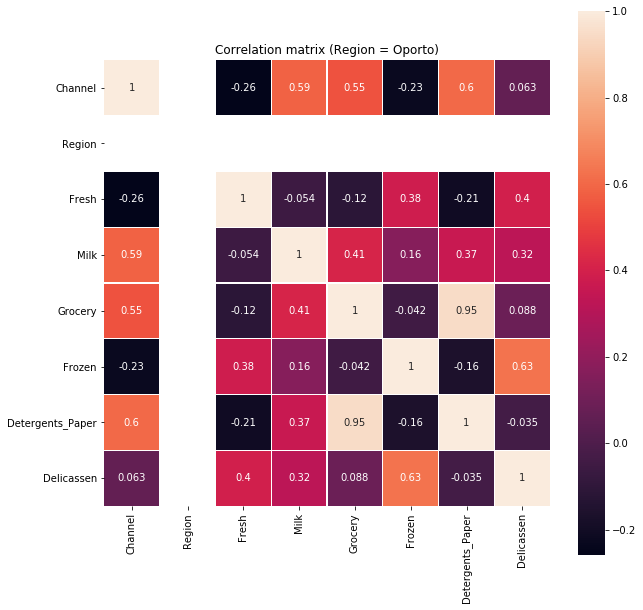

In [62]:
fig, ax = plt.subplots(figsize=(10, 10)) 
plt.title('Correlation matrix (Region = Oporto)')
sns.heatmap(corr_Oporto,linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)
plt.ylim(corr_Oporto.shape[0])
plt.show()

●Oportoでは、[GroceryとDetergents_Paper]の間に強い相関がある。次いで、[FrozenとDelicassen]となる

#### ≪最後に その他≫

In [63]:
corr_Other = base_df[base_df["Region"] == 3].corr()
corr_Other

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,NaN,-0.142583,0.445533,0.596917,-0.237399,0.627854,0.044940
Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,-0.142583,NaN,1.000000,0.145401,0.034130,0.406369,-0.057365,0.246558
Milk,0.445533,NaN,0.145401,1.000000,0.763800,0.131830,0.719272,0.411611
Grocery,0.596917,NaN,0.034130,0.763800,1.000000,-0.049407,0.929671,0.214963
Frozen,-0.237399,NaN,0.406369,0.131830,-0.049407,1.000000,-0.139730,0.457187
Detergents_Paper,0.627854,NaN,-0.057365,0.719272,0.929671,-0.139730,1.000000,0.071402
Delicassen,0.044940,NaN,0.246558,0.411611,0.214963,0.457187,0.071402,1.000000


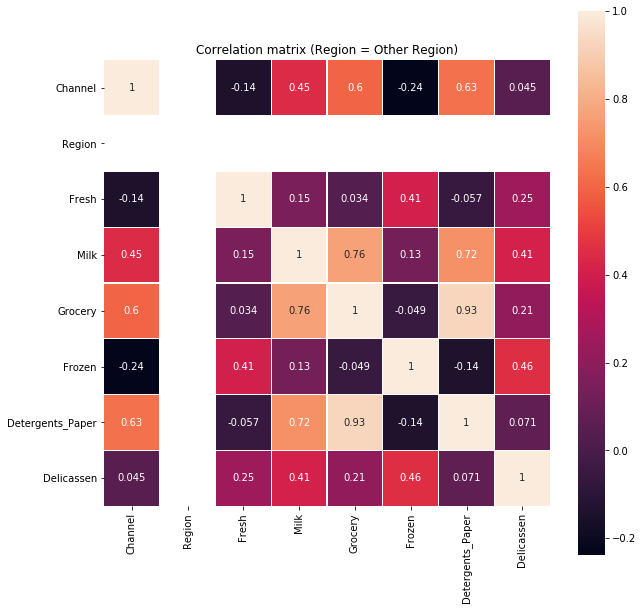

In [112]:
fig, ax = plt.subplots(figsize=(10, 10)) 
plt.title('Correlation matrix (Region = Other Region)')
sns.heatmap(corr_Other,linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)
plt.ylim(corr_Other.shape[0])
plt.show()

●Otherでは、[GroceryとDetergents_Paper]の間に強い相関がある。

以上をまとめると、  

≪棒グラフ≫から、  
Lisbonでは、FreshのみHerecaの比率が高く、それ以外はすべてRetailの比率の方が高い  
Oportoでは、FreshとFrozenはHerecaの比率が高く、それ以外はRetailの比率の方が高い  
Other Regionでは、FreshとFrozenはHerecaの比率が高く、それ以外はRetailの比率の方が高い  

≪相関≫から、  
Channel区分では、  
  ●ホテル/レストラン/カフェでは、[DelicassenとMilk]および[GroceryとMilk]の間に相関がある。  
  ●小売りでは、[MilkとGrocery]および[MilkとDetergents_Paper]の間に相関がある。  
Region区分では、  
  ●Lisbonでは、[MilkとGrocery]および[GroceryとDetergents_Paper]の間に相関がある。  
  ●Oportoでは、[GroceryとDetergents_Paper]の間に強い相関がある。次いで、[FrozenとDelicassen]となる  
  ●Otherでは、[GroceryとDetergents_Paper]の間に強い相関がある。
  
Channel区分から  
・Hereca(ホテル/レストラン/カフェ)では飲食業の店舗となるので、牛乳を中心に食料品やデリカッセンに相関がある。  
これらを関連付けた販売方法が有効であると考えられる。  
・小売りでは一般顧客の日用品の購入が主と考えられるので、牛乳/食料品/洗剤・紙製品が売り上げに寄与しているのがわかる。  
Region区分から  
・Lisbonでは、牛乳/食料品/洗剤・紙製品が相関があるが、これら関しては棒グラフから、リスボンでは小売りの比率が高い為と考えられる。  
・Oportoでは、食料品と洗剤・紙製品に相関がある。これに関しても棒グラフから小売りの比率が高い為と考えられる。  
・Other Regionでは、食料品と洗剤・紙製品に相関があり、これらも小売りの比率が高い為と考えられる。  

以上からRegion区分ではRetailの相関の影響を大きく受けていると考えれられる。